Reference: https://www.pycodemates.com/2022/12/svm-for-face-recognition-using-python.html

# Import library

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


# Import the dataset

Fetch from sklearn library

In [ ]:
faces = fetch_lfw_people()
# print(faces.DESCR)

Print the total dataset size

In [ ]:
n_samples, h, w = faces.images.shape
n_features = faces.data.shape[1]
n_classes = len(faces.target_names)

print("Total dataset size:")
print(f"n_samples: {n_samples}")
print(f"n_features: {n_features}")
print(f"n_classes: {n_classes}")

Total dataset size:
n_samples: 13233
n_features: 2914
n_classes: 5749


# Preprocessing

Visualize some images from the dataset

Some faces in the dataset:


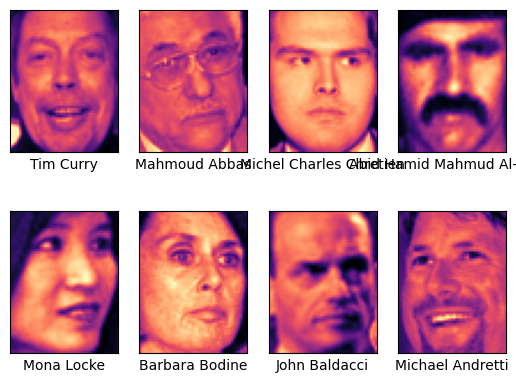

In [ ]:
figure, splits = plt.subplots(2, 4)
print("Some faces in the dataset:")
for i, splits in enumerate(splits.flat):
    splits.imshow(faces.images[i], cmap='magma')
    splits.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Split into a training set and a test set (80% for training and 20% for testing)

In [ ]:
X = faces.data # data
y = faces.target # label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model

Reduce the dimension with PCA

In [ ]:
pca = PCA(n_components=150, whiten=True, svd_solver='randomized', random_state=42)

Support Vector Classification (Support Vector Machine (SVM) used for classification tasks.)

In [ ]:
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

Fit the model

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('pca',
                 PCA(n_components=150, random_state=42, svd_solver='randomized',
                     whiten=True)),
                ('svc', SVC(class_weight='balanced'))])

# Prediction

In [ ]:
y_pred = model.predict(X_test)

# Evaluation

Calculate precision, recall, accuracy and f1-score

In [ ]:
accuracy = accuracy_score(y_pred, y_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.02
Precision: 0.00
Recall: 0.02
F1 Score: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Generate and print classification report

In [ ]:
# class_report = classification_report(y_test, y_pred, digits=2)
# print("Classification Report:")
# print(class_report)

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         5
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          38       0.00      0.00      0.00         2
          40       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         1
          52       0.00      0.00      0.00         2
          58       0.00      0.00      0.00         1
          66       0.00      0.00      0.00         1
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Quantitative evaluation of the model quality on the test set

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=faces.target_names)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, xticks_rotation='vertical', cmap='Blues')
plt.show()

NameError: name 'confusion_matrix' is not defined

Highlight classification errors with images




In [ ]:
incorrect = 0
length = len(y_pred)

fig, axes = plt.subplots(3, 3, figsize=(8, 8))
axes = axes.ravel()

for i in range(len(y_pred)):
    if y_pred[i] != y_test[i]:  # if y_pred and actual values are not equal
        prediction_name = faces.target_names[y_pred[i]]  # Getting the predicted name
        actual_name = faces.target_names[y_test[i]]  # Getting the actual name
        incorrect += 1
        if incorrect <= 9:  # Display up to 9 misclassified images
            ax = axes[incorrect - 1]
            ax.imshow(X_test[i].reshape(faces.images[0].shape), cmap='magma')
            ax.set_title(f"Actual: { actual_name }\nPredicted: {prediction_name}")
            ax.axis('off')

plt.tight_layout()
plt.show()

print(f"\n{length-incorrect} are classified as correct and {incorrect} are classified as incorrect!")